In [1]:
import pandas as pd
import string
import sys,csv,re

# Import data

In [2]:
data_prep = pd.read_excel(f'D:\MARBURG VIRUS DISEASES/data/WOSCC/woscc_bon_23_02_verif_on_wos.xls')[["UT (Unique WOS ID)",'Publication Year','Article Title','Author Keywords','Abstract']]
data_prep = data_prep.rename(columns={"UT (Unique WOS ID)": "wos_ID"})
data_prep = data_prep.applymap(lambda s:s.lower() if type(s) == str else s).set_index('wos_ID')#.set_index(['wos_ID','Publication Year'])
#data_prep = data_prep.drop_duplicates('wos_ID')
data_prep.head(1)

,Publication Year,Article Title,Author Keywords,Abstract
wos_ID,,,,
wos:000904661800001,2023.0,a rabies virus-vectored vaccine expressing two...,marburg virus disease; marburg virus; neutrali...,marburg virus disease (mvd) is a lethal viral ...


In [3]:
data_prep.shape

(932, 4)

In [4]:
data_prep.dtypes

Publication Year    float64
Article Title        object
Author Keywords      object
Abstract             object
dtype: object

In [5]:
data_prep = data_prep.apply(lambda x: x.astype(str))

In [6]:
data_prep.dtypes

Publication Year    object
Article Title       object
Author Keywords     object
Abstract            object
dtype: object

# Data cleaning

## Merge the 03 columns

In [7]:
# Concatenate three columns
data_prep['ti_ab_kw_concat'] = data_prep['Article Title'].str.cat([data_prep['Author Keywords'], data_prep['Abstract']], sep=' ')
data_prep

,Publication Year,Article Title,Author Keywords,Abstract,ti_ab_kw_concat
wos_ID,,,,,
wos:000904661800001,2023.0,a rabies virus-vectored vaccine expressing two...,marburg virus disease; marburg virus; neutrali...,marburg virus disease (mvd) is a lethal viral ...,a rabies virus-vectored vaccine expressing two...
wos:000921279800001,2023.0,combination treatment of mannose and galnac co...,nan,marburg virus (marv) infection results in seve...,combination treatment of mannose and galnac co...
wos:000909001200001,2023.0,sulfonamides with heterocyclic periphery as an...,sulfonamide; n-heterocycles; antiviral activit...,sulfonamides are the basic motifs for a whole ...,sulfonamides with heterocyclic periphery as an...
wos:000777045900001,2022.0,pathogenicity and virulence of marburg virus,marburg virus; epidemiology; pathogenicity; tr...,marburg virus (marv) has been a major concern ...,pathogenicity and virulence of marburg virus m...
wos:000849602200001,2022.0,marburg virus re-emerged in 2022: recently det...,nan,nan,marburg virus re-emerged in 2022: recently det...
...,...,...,...,...,...
wos:a1968b358900049,1968.0,human disease from monkeys (marburg virus),nan,nan,human disease from monkeys (marburg virus) nan...
wos:a1968a855300001,1968.0,an infectious disease presumably transmitted f...,nan,nan,an infectious disease presumably transmitted f...
wos:a1968a855300006,1968.0,identification and isolation of marburg virus,nan,nan,identification and isolation of marburg virus ...


## All LowerCase

In [8]:
data_prep['ti_ab_kw_concat_lower'] = data_prep['ti_ab_kw_concat'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data_prep.head(1)

,Publication Year,Article Title,Author Keywords,Abstract,ti_ab_kw_concat,ti_ab_kw_concat_lower
wos_ID,,,,,,
wos:000904661800001,2023.0,a rabies virus-vectored vaccine expressing two...,marburg virus disease; marburg virus; neutrali...,marburg virus disease (mvd) is a lethal viral ...,a rabies virus-vectored vaccine expressing two...,a rabies virus-vectored vaccine expressing two...


## Removing Punctuation

In [9]:
data_prep['ti_ab_kw_concat_lower_punc'] = data_prep['ti_ab_kw_concat_lower'].str.replace('[^\w\s]','')
data_prep.head(1)

C:\Users\dmbog\AppData\Local\Temp\ipykernel_8836\3962641720.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_prep['ti_ab_kw_concat_lower_punc'] = data_prep['ti_ab_kw_concat_lower'].str.replace('[^\w\s]','')


,Publication Year,Article Title,Author Keywords,Abstract,ti_ab_kw_concat,ti_ab_kw_concat_lower,ti_ab_kw_concat_lower_punc
wos_ID,,,,,,,
wos:000904661800001,2023.0,a rabies virus-vectored vaccine expressing two...,marburg virus disease; marburg virus; neutrali...,marburg virus disease (mvd) is a lethal viral ...,a rabies virus-vectored vaccine expressing two...,a rabies virus-vectored vaccine expressing two...,a rabies virusvectored vaccine expressing two ...


## Removal of stop words

In [10]:
#Removal of stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')  

data_prep['ti_ab_kw_concat_lower_punc_stop']  = data_prep['ti_ab_kw_concat_lower_punc'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data_prep.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dmbog\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Publication Year,Article Title,Author Keywords,Abstract,ti_ab_kw_concat,ti_ab_kw_concat_lower,ti_ab_kw_concat_lower_punc,ti_ab_kw_concat_lower_punc_stop
wos_ID,,,,,,,,
wos:000904661800001,2023.0,a rabies virus-vectored vaccine expressing two...,marburg virus disease; marburg virus; neutrali...,marburg virus disease (mvd) is a lethal viral ...,a rabies virus-vectored vaccine expressing two...,a rabies virus-vectored vaccine expressing two...,a rabies virusvectored vaccine expressing two ...,rabies virusvectored vaccine expressing two co...
wos:000921279800001,2023.0,combination treatment of mannose and galnac co...,nan,marburg virus (marv) infection results in seve...,combination treatment of mannose and galnac co...,combination treatment of mannose and galnac co...,combination treatment of mannose and galnac co...,combination treatment mannose galnac conjugate...
wos:000909001200001,2023.0,sulfonamides with heterocyclic periphery as an...,sulfonamide; n-heterocycles; antiviral activit...,sulfonamides are the basic motifs for a whole ...,sulfonamides with heterocyclic periphery as an...,sulfonamides with heterocyclic periphery as an...,sulfonamides with heterocyclic periphery as an...,sulfonamides heterocyclic periphery antiviral ...
wos:000777045900001,2022.0,pathogenicity and virulence of marburg virus,marburg virus; epidemiology; pathogenicity; tr...,marburg virus (marv) has been a major concern ...,pathogenicity and virulence of marburg virus m...,pathogenicity and virulence of marburg virus m...,pathogenicity and virulence of marburg virus m...,pathogenicity virulence marburg virus marburg ...
wos:000849602200001,2022.0,marburg virus re-emerged in 2022: recently det...,nan,nan,marburg virus re-emerged in 2022: recently det...,marburg virus re-emerged in 2022: recently det...,marburg virus reemerged in 2022 recently detec...,marburg virus reemerged 2022 recently detected...


## Tokenization

In [11]:
# !pip install textblob

In [12]:
#Tokenization
import textblob           
from textblob import TextBlob
def tokenization(text):
    text = re.split('\W+', text)
    return text
data_prep['ti_ab_kw_concat_lower_punc_stop_tokenized'] = data_prep['ti_ab_kw_concat_lower_punc_stop'].apply(lambda x: tokenization(x.lower()))
data_prep.head(1)

,Publication Year,Article Title,Author Keywords,Abstract,ti_ab_kw_concat,ti_ab_kw_concat_lower,ti_ab_kw_concat_lower_punc,ti_ab_kw_concat_lower_punc_stop,ti_ab_kw_concat_lower_punc_stop_tokenized
wos_ID,,,,,,,,,
wos:000904661800001,2023.0,a rabies virus-vectored vaccine expressing two...,marburg virus disease; marburg virus; neutrali...,marburg virus disease (mvd) is a lethal viral ...,a rabies virus-vectored vaccine expressing two...,a rabies virus-vectored vaccine expressing two...,a rabies virusvectored vaccine expressing two ...,rabies virusvectored vaccine expressing two co...,"[rabies, virusvectored, vaccine, expressing, t..."


## Stemming

In [13]:
#Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. 
#For this purpose, we will use PorterStemmer from the NLTK library.
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stemming(text):
   text = [ps.stem(word) for word in text]
   return text

data_prep['ti_ab_kw_concat_lower_punc_stop_tokenized_stemmed'] = data_prep['ti_ab_kw_concat_lower_punc_stop_tokenized'].apply(lambda x: stemming(x))
data_prep.head(3)

,Publication Year,Article Title,Author Keywords,Abstract,ti_ab_kw_concat,ti_ab_kw_concat_lower,ti_ab_kw_concat_lower_punc,ti_ab_kw_concat_lower_punc_stop,ti_ab_kw_concat_lower_punc_stop_tokenized,ti_ab_kw_concat_lower_punc_stop_tokenized_stemmed
wos_ID,,,,,,,,,,
wos:000904661800001,2023.0,a rabies virus-vectored vaccine expressing two...,marburg virus disease; marburg virus; neutrali...,marburg virus disease (mvd) is a lethal viral ...,a rabies virus-vectored vaccine expressing two...,a rabies virus-vectored vaccine expressing two...,a rabies virusvectored vaccine expressing two ...,rabies virusvectored vaccine expressing two co...,"[rabies, virusvectored, vaccine, expressing, t...","[rabi, virusvector, vaccin, express, two, copi..."
wos:000921279800001,2023.0,combination treatment of mannose and galnac co...,nan,marburg virus (marv) infection results in seve...,combination treatment of mannose and galnac co...,combination treatment of mannose and galnac co...,combination treatment of mannose and galnac co...,combination treatment mannose galnac conjugate...,"[combination, treatment, mannose, galnac, conj...","[combin, treatment, mannos, galnac, conjug, sm..."
wos:000909001200001,2023.0,sulfonamides with heterocyclic periphery as an...,sulfonamide; n-heterocycles; antiviral activit...,sulfonamides are the basic motifs for a whole ...,sulfonamides with heterocyclic periphery as an...,sulfonamides with heterocyclic periphery as an...,sulfonamides with heterocyclic periphery as an...,sulfonamides heterocyclic periphery antiviral ...,"[sulfonamides, heterocyclic, periphery, antivi...","[sulfonamid, heterocycl, peripheri, antivir, a..."


## Lemmatization

In [14]:
#Lemmatization is a more effective option than stemming because it converts the word into its root word, 
#rather than just stripping the suffices.
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

data_prep['ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized'] = data_prep['ti_ab_kw_concat_lower_punc_stop_tokenized'].apply(lambda x: lemmatizer(x))
data_prep.head(3)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dmbog\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Publication Year,Article Title,Author Keywords,Abstract,ti_ab_kw_concat,ti_ab_kw_concat_lower,ti_ab_kw_concat_lower_punc,ti_ab_kw_concat_lower_punc_stop,ti_ab_kw_concat_lower_punc_stop_tokenized,ti_ab_kw_concat_lower_punc_stop_tokenized_stemmed,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized
wos_ID,,,,,,,,,,,
wos:000904661800001,2023.0,a rabies virus-vectored vaccine expressing two...,marburg virus disease; marburg virus; neutrali...,marburg virus disease (mvd) is a lethal viral ...,a rabies virus-vectored vaccine expressing two...,a rabies virus-vectored vaccine expressing two...,a rabies virusvectored vaccine expressing two ...,rabies virusvectored vaccine expressing two co...,"[rabies, virusvectored, vaccine, expressing, t...","[rabi, virusvector, vaccin, express, two, copi...","[rabies, virusvectored, vaccine, expressing, t..."
wos:000921279800001,2023.0,combination treatment of mannose and galnac co...,nan,marburg virus (marv) infection results in seve...,combination treatment of mannose and galnac co...,combination treatment of mannose and galnac co...,combination treatment of mannose and galnac co...,combination treatment mannose galnac conjugate...,"[combination, treatment, mannose, galnac, conj...","[combin, treatment, mannos, galnac, conjug, sm...","[combination, treatment, mannose, galnac, conj..."
wos:000909001200001,2023.0,sulfonamides with heterocyclic periphery as an...,sulfonamide; n-heterocycles; antiviral activit...,sulfonamides are the basic motifs for a whole ...,sulfonamides with heterocyclic periphery as an...,sulfonamides with heterocyclic periphery as an...,sulfonamides with heterocyclic periphery as an...,sulfonamides heterocyclic periphery antiviral ...,"[sulfonamides, heterocyclic, periphery, antivi...","[sulfonamid, heterocycl, peripheri, antivir, a...","[sulfonamide, heterocyclic, periphery, antivir..."


## Save

In [15]:
data_prep.to_csv('D:\MARBURG VIRUS DISEASES\DATA_PREPROCESSING/data_prep_Cleaned.csv')
data_prep.to_pickle('D:\MARBURG VIRUS DISEASES\DATA_PREPROCESSING/data_prep_Cleaned.pkl')

# Unsupervised_LDA

In [16]:
# Importing packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [17]:
# Import data 
data_prep_copy = data_prep.copy()
# pop columns Article_Title_lemmatized
data_prep_lemmatized2 =  data_prep_copy['ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized'].to_frame()
# print
data_prep_lemmatized2

,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized
wos_ID,
wos:000904661800001,"[rabies, virusvectored, vaccine, expressing, t..."
wos:000921279800001,"[combination, treatment, mannose, galnac, conj..."
wos:000909001200001,"[sulfonamide, heterocyclic, periphery, antivir..."
wos:000777045900001,"[pathogenicity, virulence, marburg, virus, mar..."
wos:000849602200001,"[marburg, virus, reemerged, 2022, recently, de..."
...,...
wos:a1968b358900049,"[human, disease, monkey, marburg, virus, nan, ..."
wos:a1968a855300001,"[infectious, disease, presumably, transmitted,..."
wos:a1968a855300006,"[identification, isolation, marburg, virus, na..."


In [18]:
# convert columns to string
data_prep_lemmatized2['ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str'] = data_prep_lemmatized2['ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized'].astype('str') 
data_prep_lemmatized2

,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str
wos_ID,,
wos:000904661800001,"[rabies, virusvectored, vaccine, expressing, t...","['rabies', 'virusvectored', 'vaccine', 'expres..."
wos:000921279800001,"[combination, treatment, mannose, galnac, conj...","['combination', 'treatment', 'mannose', 'galna..."
wos:000909001200001,"[sulfonamide, heterocyclic, periphery, antivir...","['sulfonamide', 'heterocyclic', 'periphery', '..."
wos:000777045900001,"[pathogenicity, virulence, marburg, virus, mar...","['pathogenicity', 'virulence', 'marburg', 'vir..."
wos:000849602200001,"[marburg, virus, reemerged, 2022, recently, de...","['marburg', 'virus', 'reemerged', '2022', 'rec..."
...,...,...
wos:a1968b358900049,"[human, disease, monkey, marburg, virus, nan, ...","['human', 'disease', 'monkey', 'marburg', 'vir..."
wos:a1968a855300001,"[infectious, disease, presumably, transmitted,...","['infectious', 'disease', 'presumably', 'trans..."
wos:a1968a855300006,"[identification, isolation, marburg, virus, na...","['identification', 'isolation', 'marburg', 'vi..."


In [19]:
# Remove ponctuation
data_prep_lemmatized2['ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str1'] = data_prep_lemmatized2['ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str'].str.replace('[^\w\s]','')
data_prep_lemmatized2

C:\Users\dmbog\AppData\Local\Temp\ipykernel_8836\3978594849.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_prep_lemmatized2['ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str1'] = data_prep_lemmatized2['ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str'].str.replace('[^\w\s]','')


,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str1
wos_ID,,,
wos:000904661800001,"[rabies, virusvectored, vaccine, expressing, t...","['rabies', 'virusvectored', 'vaccine', 'expres...",rabies virusvectored vaccine expressing two co...
wos:000921279800001,"[combination, treatment, mannose, galnac, conj...","['combination', 'treatment', 'mannose', 'galna...",combination treatment mannose galnac conjugate...
wos:000909001200001,"[sulfonamide, heterocyclic, periphery, antivir...","['sulfonamide', 'heterocyclic', 'periphery', '...",sulfonamide heterocyclic periphery antiviral a...
wos:000777045900001,"[pathogenicity, virulence, marburg, virus, mar...","['pathogenicity', 'virulence', 'marburg', 'vir...",pathogenicity virulence marburg virus marburg ...
wos:000849602200001,"[marburg, virus, reemerged, 2022, recently, de...","['marburg', 'virus', 'reemerged', '2022', 'rec...",marburg virus reemerged 2022 recently detected...
...,...,...,...
wos:a1968b358900049,"[human, disease, monkey, marburg, virus, nan, ...","['human', 'disease', 'monkey', 'marburg', 'vir...",human disease monkey marburg virus nan nan
wos:a1968a855300001,"[infectious, disease, presumably, transmitted,...","['infectious', 'disease', 'presumably', 'trans...",infectious disease presumably transmitted monk...
wos:a1968a855300006,"[identification, isolation, marburg, virus, na...","['identification', 'isolation', 'marburg', 'vi...",identification isolation marburg virus nan nan


In [20]:
#Removal of stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dmbog\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
#stop.pop()
stop[-21:]

['isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

In [22]:
data_prep_lemmatized2['Tokens']  = data_prep_lemmatized2['ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str1'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data_prep_lemmatized2.head()

,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str1,Tokens
wos_ID,,,,
wos:000904661800001,"[rabies, virusvectored, vaccine, expressing, t...","['rabies', 'virusvectored', 'vaccine', 'expres...",rabies virusvectored vaccine expressing two co...,rabies virusvectored vaccine expressing two co...
wos:000921279800001,"[combination, treatment, mannose, galnac, conj...","['combination', 'treatment', 'mannose', 'galna...",combination treatment mannose galnac conjugate...,combination treatment mannose galnac conjugate...
wos:000909001200001,"[sulfonamide, heterocyclic, periphery, antivir...","['sulfonamide', 'heterocyclic', 'periphery', '...",sulfonamide heterocyclic periphery antiviral a...,sulfonamide heterocyclic periphery antiviral a...
wos:000777045900001,"[pathogenicity, virulence, marburg, virus, mar...","['pathogenicity', 'virulence', 'marburg', 'vir...",pathogenicity virulence marburg virus marburg ...,pathogenicity virulence marburg virus marburg ...
wos:000849602200001,"[marburg, virus, reemerged, 2022, recently, de...","['marburg', 'virus', 'reemerged', '2022', 'rec...",marburg virus reemerged 2022 recently detected...,marburg virus reemerged 2022 recently detected...


In [23]:
data_prep_lemmatized2.count()

ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized         932
ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str     932
ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str1    932
Tokens                                                       932
dtype: int64

## Pre processing

In [24]:
data_prep_lemmatized2.head()

,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str1,Tokens
wos_ID,,,,
wos:000904661800001,"[rabies, virusvectored, vaccine, expressing, t...","['rabies', 'virusvectored', 'vaccine', 'expres...",rabies virusvectored vaccine expressing two co...,rabies virusvectored vaccine expressing two co...
wos:000921279800001,"[combination, treatment, mannose, galnac, conj...","['combination', 'treatment', 'mannose', 'galna...",combination treatment mannose galnac conjugate...,combination treatment mannose galnac conjugate...
wos:000909001200001,"[sulfonamide, heterocyclic, periphery, antivir...","['sulfonamide', 'heterocyclic', 'periphery', '...",sulfonamide heterocyclic periphery antiviral a...,sulfonamide heterocyclic periphery antiviral a...
wos:000777045900001,"[pathogenicity, virulence, marburg, virus, mar...","['pathogenicity', 'virulence', 'marburg', 'vir...",pathogenicity virulence marburg virus marburg ...,pathogenicity virulence marburg virus marburg ...
wos:000849602200001,"[marburg, virus, reemerged, 2022, recently, de...","['marburg', 'virus', 'reemerged', '2022', 'rec...",marburg virus reemerged 2022 recently detected...,marburg virus reemerged 2022 recently detected...


Be defining the CountVectorizer object as below, we ignore:

1. all terms that occur over 75% times in our document corpus. We say in this case that the terms occuring more than this threshold are not significant, most of them are stopwords
2. all the terms that occur fewer than twice in the entire corpus.

In [25]:
cv = CountVectorizer(max_df=0.75, min_df=2)
dtm = cv.fit_transform(data_prep_lemmatized2['Tokens'])

dtm

<932x5486 sparse matrix of type '<class 'numpy.int64'>'
	with 74070 stored elements in Compressed Sparse Row format>

In [26]:
# We can also get all those words using the get_feature_names() function
feature_names = cv.get_feature_names()
len(feature_names) # show the total number of distinct words

5486

In [27]:
temp_file = pd.DataFrame(feature_names)

In [28]:
len(temp_file[0].unique())

5486

In [29]:
feature_names[500:520]

['antiviral',
 'antivp35',
 'apart',
 'ape',
 'apical',
 'apoptosis',
 'apoptotic',
 'apparatus',
 'apparent',
 'apparently',
 'appear',
 'appearance',
 'appeared',
 'appears',
 'appetite',
 'applicability',
 'applicable',
 'application',
 'applied',
 'apply']

## LDA

From our DTM matrix, we can now build our LDA to extract topics from the underlined texts. The number of topic to be extracted is a hyperparameter, so we do not know it a a glance. In our case, we will be using 25 topics. <br>
LDA is an iterative algorithm, we will have 25 iterations in our case, but the default value is 10.

In [30]:
NUM_TOPICS = 10
LDA_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=30, random_state=42)

In [31]:
LDA_model.fit(dtm)

LatentDirichletAllocation(max_iter=30, random_state=42)

### Show Stored Words
Let's randomnly have a look at some words of that have been stored.

In [32]:
len(feature_names)

5486

In [33]:
import random 
for index in range(50):
    random_word_ID = random.randint(0, len(feature_names))
    print(cv.get_feature_names()[random_word_ID])

academia
interpret
disorder
cancer
immunofluorescence
period
currently
machinery
stat1
unexposed
visualized
crossreactivity
psap
evolved
biogenesis
creates
nausea
nonretroviral
british
reason
scientific
ml
neural
vast
soren
production
deviation
eids
physiology
exchange
individually
retinopathy
simultaneously
tourist
extant
pathology
spreading
llov
rule
quantified
hit
merscov
1993
grivet
vps4
guinea
reach
behavioral
temporal
atlantis


## Top Words Per Topic

In [34]:
len(LDA_model.components_[0])

5486

In [35]:
# Pick a single topic 
a_topic = LDA_model.components_[0]

# Get the indices that would sort this array
a_topic.argsort()

array([2823,  635, 5457, ..., 4540, 3373, 1633], dtype=int64)

In [36]:
top_50_words_indices = a_topic.argsort()[-50:]

for i in top_50_words_indices:
    print(cv.get_feature_names()[i])

alignment
including
lineage
name
different
tumor
therapy
compared
similar
distinct
ravn
musoke
paramyxovirus
angola
element
polyclonal
genetic
new
lectin
several
lassa
brain
within
may
end
using
pseudotypes
type
comparison
also
amino
signal
ebo
vsv
cell
acid
gp
two
glycoprotein
found
nucleotide
specie
genome
mbg
strain
filovirus
gene
sequence
nan
ebola


In [37]:
for i, topic in enumerate(LDA_model.components_):
    print("THE TOP {} WORDS FOR TOPIC #{}".format(20, i))
    print([cv.get_feature_names()[index] for index in topic.argsort()[-20:]])
    print("\n")

THE TOP 20 WORDS FOR TOPIC #0
['amino', 'signal', 'ebo', 'vsv', 'cell', 'acid', 'gp', 'two', 'glycoprotein', 'found', 'nucleotide', 'specie', 'genome', 'mbg', 'strain', 'filovirus', 'gene', 'sequence', 'nan', 'ebola']


THE TOP 20 WORDS FOR TOPIC #1
['host', 'release', 'surface', 'assembly', 'interaction', 'cellular', 'viruslike', 'expression', 'matrix', 'domain', 'gp', 'vlps', 'budding', 'membrane', 'viral', 'particle', 'marv', 'cell', 'vp40', 'protein']


THE TOP 20 WORDS FOR TOPIC #2
['analysis', 'conserved', 'system', 'polymerase', 'acid', 'vp30', 'transcription', 'region', 'gene', 'nucleoprotein', 'structure', 'replication', 'ebov', 'genome', 'viral', 'marv', 'vp35', 'protein', 'np', 'rna']


THE TOP 20 WORDS FOR TOPIC #3
['candidate', 'lethal', 'protective', 'nonhuman', 'glycoprotein', 'primate', 'study', 'vector', 'animal', 'immune', 'disease', 'ebov', 'challenge', 'ebola', 'protection', 'response', 'antibody', 'filovirus', 'marv', 'vaccine']


THE TOP 20 WORDS FOR TOPIC #4
['di

In [38]:
# data_prep_lemmatized2["Topic N°"].value_counts()

## Attach Discovered Topic Labels to Original Tweets
**final_topics** contains, for each of our 12000 tweets, the probability score of how likely a tweet belongs to each of the 20 topics.  This is a Document X Topics matrix. 
For example, below is the probability values for the first tweet.

In [39]:
final_topics = LDA_model.transform(dtm)
final_topics.shape

(932, 10)

In [40]:
final_topics[10]

array([0.00080658, 0.18231765, 0.00080657, 0.00080665, 0.00080661,
       0.00080673, 0.23815313, 0.29424395, 0.15407171, 0.12718041])

In [41]:
final_topics[10].argmax()

7

This value (5) means that our LDA model thinks that the tenth articles belongs to the 5th topic.

### Combination with the original data
Let's create a new column called Topic N° that will correspond to the topic value to which each tweet belongs to.

In [42]:
data_prep_lemmatized2["Topic N°"] = final_topics.argmax(axis=1)

In [43]:
# save
data_prep_lemmatized2.to_csv('D:\MARBURG VIRUS DISEASES\DATA_PREPROCESSING/data_prep_lemmatized_topics.csv')
data_prep_lemmatized2.to_pickle('D:\MARBURG VIRUS DISEASES\DATA_PREPROCESSING/data_prep_lemmatized_topics.pkl')


data_prep_lemmatized2.head(10)

,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str1,Tokens,Topic N°
wos_ID,,,,,
wos:000904661800001,"[rabies, virusvectored, vaccine, expressing, t...","['rabies', 'virusvectored', 'vaccine', 'expres...",rabies virusvectored vaccine expressing two co...,rabies virusvectored vaccine expressing two co...,3
wos:000921279800001,"[combination, treatment, mannose, galnac, conj...","['combination', 'treatment', 'mannose', 'galna...",combination treatment mannose galnac conjugate...,combination treatment mannose galnac conjugate...,5
wos:000909001200001,"[sulfonamide, heterocyclic, periphery, antivir...","['sulfonamide', 'heterocyclic', 'periphery', '...",sulfonamide heterocyclic periphery antiviral a...,sulfonamide heterocyclic periphery antiviral a...,7
wos:000777045900001,"[pathogenicity, virulence, marburg, virus, mar...","['pathogenicity', 'virulence', 'marburg', 'vir...",pathogenicity virulence marburg virus marburg ...,pathogenicity virulence marburg virus marburg ...,8
wos:000849602200001,"[marburg, virus, reemerged, 2022, recently, de...","['marburg', 'virus', 'reemerged', '2022', 'rec...",marburg virus reemerged 2022 recently detected...,marburg virus reemerged 2022 recently detected...,8
wos:000922983600001,"[application, comparison, lyophilisation, prot...","['application', 'comparison', 'lyophilisation'...",application comparison lyophilisation protocol...,application comparison lyophilisation protocol...,9
wos:000905136600002,"[singleshot, chad3marv, vaccine, confers, rapi...","['singleshot', 'chad3marv', 'vaccine', 'confer...",singleshot chad3marv vaccine confers rapid dur...,singleshot chad3marv vaccine confers rapid dur...,3
wos:000902783200001,"[filovirus, innate, immunity, inflammatory, ce...","['filovirus', 'innate', 'immunity', 'inflammat...",filovirus innate immunity inflammatory cell de...,filovirus innate immunity inflammatory cell de...,4
wos:000908420500019,"[marburg, virus, monkeypox, virus, concurrent,...","['marburg', 'virus', 'monkeypox', 'virus', 'co...",marburg virus monkeypox virus concurrent outbr...,marburg virus monkeypox virus concurrent outbr...,8


In [44]:
data_prep_lemmatized2["Topic N°"].value_counts()

7    170
5    141
8    107
6     91
9     89
3     79
1     79
0     66
2     59
4     51
Name: Topic N°, dtype: int64

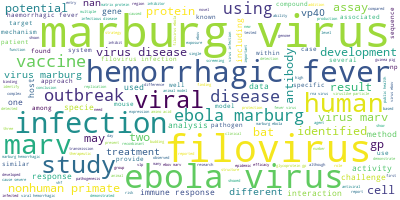

In [45]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(data_prep_lemmatized2['ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str1'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

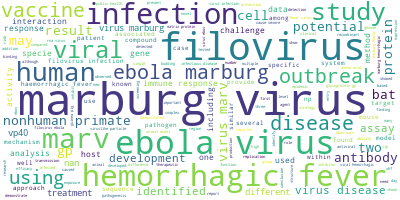

In [46]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ' '.join(list(data_prep_lemmatized2['Tokens'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
cloud = wordcloud.generate(long_string)
# Visualize the word cloud

cloud.to_file('D:\MARBURG VIRUS DISEASES\TABLES/tokens_ti_ab_kw_wordcloud.png')

wordcloud.to_image()

In [47]:
# !pip install pyLDAvis

In [48]:
import pyLDAvis.sklearn

In [49]:
pyLDAvis.enable_notebook() # To enable the visualization on the notebook

In [50]:
panel = pyLDAvis.sklearn.prepare(LDA_model, dtm, cv, mds='tsne') # Create the panel for the visualization

pyLDAvis.save_html(panel, 'D:\MARBURG VIRUS DISEASES/TABLES/lda.html')

panel

<>:3: DeprecationWarning: invalid escape sequence \M
<>:3: DeprecationWarning: invalid escape sequence \M
C:\Users\dmbog\AppData\Local\Temp\ipykernel_8836\1947442577.py:3: DeprecationWarning: invalid escape sequence \M
  pyLDAvis.save_html(panel, 'D:\MARBURG VIRUS DISEASES/TABLES/lda.html')
C:\Users\dmbog\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\dmbog\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
7      32.420952   8.115230       1        1  16.779184
5       0.648955  71.707100       2        1  14.481135
8      71.019684   9.971006       3        1  10.799653
6       3.785981  33.185135       4        1  10.343655
1     -42.666500  -9.222070       5        1   9.943948
3      -3.621689 -43.526516       6        1   9.467798
9      -3.632402  -4.171708       7        1   9.026172
2     -36.584400  35.804413       8        1   7.317880
4      44.391380  50.615383       9        1   7.236789
0      40.235809 -31.591665      10        1   4.603785, topic_info=         Term        Freq       Total Category  logprob  loglift
5261  vaccine  780.000000  780.000000  Default  30.0000  30.0000
4039  protein  638.000000  638.000000  Default  29.0000  29.0000
646       bat  445.000000  445.000000  Default  28.0000  28.0000
1522  disease  968.000000  968.000000  Default  27.0000  27.0000
885      cell  752.000000  752.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
5436   within   17.601827  148.428898  Topic10  -5.6497   0.9462
403      also   18.914916  278.349591  Topic10  -5.5778   0.3894
5247    using   17.832626  276.234068  Topic10  -5.6367   0.3381
3124      may   17.695010  256.680300  Topic10  -5.6445   0.4037
2871    lassa   15.740893  157.899600  Topic10  -5.7615   0.7726

[713 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
64       10  0.912727          1987
187      10  0.874903           681
210       2  0.065536            95
210       3  0.917511            95
216      10  0.912728  abbreviation
...     ...       ...           ...
5483      3  0.925810          zone
5485      1  0.449517      zoonotic
5485      3  0.449517      zoonotic
5485      7  0.033926      zoonotic
5485      9  0.059370      zoonotic

[1613 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 9, 7, 2, 4, 10, 3, 5, 1])

In [51]:
data_prep_lemmatized2.head()

,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str,ti_ab_kw_concat_lower_punc_stop_tokenized_lemmatized_str1,Tokens,Topic N°
wos_ID,,,,,
wos:000904661800001,"[rabies, virusvectored, vaccine, expressing, t...","['rabies', 'virusvectored', 'vaccine', 'expres...",rabies virusvectored vaccine expressing two co...,rabies virusvectored vaccine expressing two co...,3
wos:000921279800001,"[combination, treatment, mannose, galnac, conj...","['combination', 'treatment', 'mannose', 'galna...",combination treatment mannose galnac conjugate...,combination treatment mannose galnac conjugate...,5
wos:000909001200001,"[sulfonamide, heterocyclic, periphery, antivir...","['sulfonamide', 'heterocyclic', 'periphery', '...",sulfonamide heterocyclic periphery antiviral a...,sulfonamide heterocyclic periphery antiviral a...,7
wos:000777045900001,"[pathogenicity, virulence, marburg, virus, mar...","['pathogenicity', 'virulence', 'marburg', 'vir...",pathogenicity virulence marburg virus marburg ...,pathogenicity virulence marburg virus marburg ...,8
wos:000849602200001,"[marburg, virus, reemerged, 2022, recently, de...","['marburg', 'virus', 'reemerged', '2022', 'rec...",marburg virus reemerged 2022 recently detected...,marburg virus reemerged 2022 recently detected...,8
